# Fig 3: EWPO, Diboson & Higgs fit to hybrid $U(3)^5$ benchmark

In [1]:
import sys
import math
import numpy as np
import pandas as pd
from collections import OrderedDict

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, LogLocator
from matplotlib.offsetbox import AnchoredText

from mpl_toolkits import axes_grid1
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# %matplotlib inline 
# colours
green, lightblue, orange, yellow, blue, red, purple, pink, darkblue, brown = (
  "#009e73", "#56b4e9", "#e69f00", "#f0e442", "#0072b2", "#e51e10", "#9400d3", "#f684b6", "#01579B", "#8D6E63"
)
lightgrey, grey, darkgrey = '#CCD7DB','#96ABB3','#586D75'

sys.path.append('../')
from fitmaker.fitlib.fitter import FitterChiSquare
from fitmaker.fitlib.fitter import FitterAnalyticalChiSquare
from fitmaker.fitlib.observable import ObsGroup, Obs
from fitmaker.fitlib.theory import internal_parameter

from util import coeffs_tex as otex, linear_fit_df

Useful functions

In [2]:
def strform(fac):
    if fac !=1. and np.log10(fac) == float(int( np.log10(fac) )):
        return r'$10^{{{}}}$'.format(int(np.log10(fac)))
    else:
        return str(fac)

In [3]:
def plot_limits(bf, sd, ax=None, label=None, offset=0., col='k', marker='s', **kwargs):
    '''
    Plot vertical errorbars centred on bf with width 2*sd.
    '''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
    
    posns = 1. + offset + np.array(range(len(bf)))

    ax.errorbar(
        posns, 
        bf, 
        yerr = sd*2., 
        fmt=marker, markersize=4, c=col, label=label, **kwargs
    )      
    return ax    

In [4]:
def plot_bar(scale, ax=None, label=None, offset=0., width=0.2, col='k', alpha=1.0, ls='-', **kwargs):

    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
        
    posns = 1. + offset + np.array(range(len(scale)))

    ax.bar(posns, scale,   width=width, facecolor=col, alpha=alpha, linestyle=ls, **kwargs)
    return ax

In [5]:
def plot_transparent_bar(scale, ax=None, label=None, offset=0., width=0.2, col='k', ls='solid', **kwargs):

    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
        
    posns = 1. + offset + np.array(range(len(scale)))

    ax.bar(posns, scale,   width=width, edgecolor=col, facecolor=(1,1,1,0), ls=ls, **kwargs)
    return ax

# Load data

In [6]:
# some pre-combined datasets in data.py
from data import EWPO_data, Diboson_data, Diboson_LEP_data, Diboson_LHC_data_new
from data import Diboson_LHC_Zjj_data, Diboson_LHC_WW, Diboson_LHC_WZ
from data import Higgs_data_new, Higgs_data_old, Higgs_data_new_SS

Combinations of data: Diboson   

In [7]:
# Full Diboson dataset from 2020 fit
Diboson_data = ObsGroup({'observable_group_name':"Diboson_data", 'description':"LEP & LHC Diboson data"})
Diboson_data.add_obs(
  Diboson_LEP_data,
  Diboson_LHC_data_new,
  Diboson_LHC_Zjj_data
)

# Diboson dataset without Zjj measurement from 2020 fit
Diboson_no_Zjj_data = ObsGroup({'observable_group_name':"Diboson_noZjj_data", 'description':"LEP & LHC Diboson data"})
Diboson_no_Zjj_data.add_obs(
  Diboson_LEP_data,
  Diboson_LHC_data_new
)

# Diboson dataset from 2018 fit
Diboson_data_old = ObsGroup({'observable_group_name':"Diboson_data_old", 'description':"LEP & LHC Diboson data"})
Diboson_data_old.add_obs(
  Diboson_LEP_data,
  Diboson_LHC_WW
)


Combinations

In [8]:
# Full EWPO, Diboson & Higgs dataset from 2020 fit
EWPO_Diboson_Higgs_data = ObsGroup({'observable_group_name':"EWPO_Diboson_Higgs_data", 'description':"new EWPO, Diboson & Higgs data"})
EWPO_Diboson_Higgs_data.add_obs(
  EWPO_data,
  Diboson_data,
  Higgs_data_new
)

# EWPO, Diboson & Higgs dataset without Zjj measurement from 2020 fit
EWPO_Diboson_Higgs_no_Zjj_data = ObsGroup({'observable_group_name':"EWPO_Diboson_Higgs_noZjj_data", 'description':"new EWPO, Diboson & Higgs data"})
EWPO_Diboson_Higgs_no_Zjj_data.add_obs(
  EWPO_data,
  Diboson_no_Zjj_data,
  Higgs_data_new
)

# Full EWPO, Diboson & Higgs dataset from 2018 fit
EWPO_Diboson_Higgs_old_data = ObsGroup({'observable_group_name':"EWPO_Diboson_Higgs_old_data", 'description':"new EWPO, Diboson & Higgs data"})
EWPO_Diboson_Higgs_old_data.add_obs(
  EWPO_data,
  Diboson_data_old,
  Higgs_data_old
)

# Full Diboson & Higgs dataset from 2020 fit
Diboson_Higgs_data = ObsGroup({'observable_group_name':"Diboson_Higgs_data", 'description':"Diboson & Higgs data"})
Diboson_Higgs_data.add_obs(
  Diboson_data,
  Higgs_data_new
)

# EWPO, Diboson & Higgs dataset without STXS measurements from 2020 fit
EWPO_Diboson_Higgs_no_STXS_data = ObsGroup({'observable_group_name':"EWPO_Diboson_Higgs_no_STXS_data", 'description':"new EWPO, Diboson & Higgs data"})
EWPO_Diboson_Higgs_no_STXS_data.add_obs(
  EWPO_data,
  Diboson_data,
  Higgs_data_new_SS
)

# Import theory models

In [9]:
from models import SMEFT_hybrid

Subclasses

In [10]:
class SMEFT_hybrid_noCG(SMEFT_hybrid):

    @internal_parameter()
    def CG(self):
        return 0.

Coefficients

In [11]:
coeffs_hybrid = ['CHWB', 'CHD', 'Cll', 'CHl3', 'CHl1', 'CHe', 'CHq3', 'CHq1', 'CHd', 'CHu', 
                 'CHbox', 'CHG', 'CHW', 'CHB', 'CW', 'CG', 'CtaH', 'CmuH', 'CbH', 'CtH' ]

coeffs_hybrid_noCG = [ c for c in coeffs_hybrid if c!='CG']

Fits! need to combine fit_all and fit_full

In [12]:
fit_hybr, df_hybr = linear_fit_df(EWPO_Diboson_Higgs_data, SMEFT_hybrid, coeffs_hybrid, Lambda=1000.)
fit_hybr_noCG, df_hybr_noCG = linear_fit_df(EWPO_Diboson_Higgs_data, SMEFT_hybrid_noCG, coeffs_hybrid_noCG, Lambda=1000.)

In [13]:
from scipy.stats import chi2
print("chi2 per dof of the EWPO+Diboson+Higgs, theory with global symmetry:",np.round(fit_hybr.chi2_ndof,3))
print("with p-value",1-chi2.cdf(fit_hybr.chi2_ndof*fit_hybr.ndof,fit_hybr.ndof))
print("chi2 per dof of the EWPO+Diboson+Higgs, SM theory:",np.round(fit_hybr.chi2_ndof_0,3))
print("with p-value",1-chi2.cdf(fit_hybr.chi2_ndof_0*fit_hybr.nobs,fit_hybr.nobs))
print("\n")

chi2 per dof of the EWPO+Diboson+Higgs, theory with global symmetry: 0.93
with p-value 0.7429417960549741
chi2 per dof of the EWPO+Diboson+Higgs, SM theory: 0.929
with p-value 0.7595638489143612




### Hybrid Higgs+EWPO+diboson fits
1. old
2. no STXS
3. full dataset
4. no Zjj

In [14]:
fit, df = OrderedDict(), OrderedDict()
fit['hybr_old'], df['hybr_old'] = linear_fit_df(EWPO_Diboson_Higgs_old_data, SMEFT_hybrid, coeffs_hybrid, Lambda=1000.)
fit['hybr_no_STXS'], df['hybr_no_STXS'] = linear_fit_df(EWPO_Diboson_Higgs_no_STXS_data, SMEFT_hybrid, coeffs_hybrid, Lambda=1000.)
fit['hybr'], df['hybr'] = linear_fit_df(EWPO_Diboson_Higgs_data, SMEFT_hybrid, coeffs_hybrid, Lambda=1000.)
fit['hybr_no_Zjj'], df['hybr_no_Zjj'] = linear_fit_df(EWPO_Diboson_Higgs_no_Zjj_data, SMEFT_hybrid, coeffs_hybrid, Lambda=1000.)

#### chi2 per dof

In [15]:
print(np.round(fit['hybr'].chi2_ndof,5),np.round(fit['hybr'].chi2_ndof_0,5))

0.93003 0.92869


## collect best fit points, 95% C.L intervals for individual & marginalised fits

In [16]:
plot_coeffs = coeffs_hybrid
bfs, sds = OrderedDict(), OrderedDict()
for lab,d in df.items():
    bfs[lab] = {}
    bfs[lab]['ind'] = np.array([
      d['individual best-fit'].iloc[ coeffs_hybrid.index(k) ] 
      if k in coeffs_hybrid else np.nan 
      for k in plot_coeffs 
    ])
    bfs[lab]['mar'] = np.array([
      d['marginalised best-fit'].iloc[ coeffs_hybrid.index(k) ] 
      if k in coeffs_hybrid else np.nan 
      for k in plot_coeffs 
    ])
    
    sds[lab] = {}
    sds[lab]['ind'] = np.array([
      d['individual s.d.'].iloc[ coeffs_hybrid.index(k) ] 
      if k in coeffs_hybrid else np.nan 
      for k in plot_coeffs 
    ])
    sds[lab]['mar'] = np.array([
      d['marginalised s.d.'].iloc[ coeffs_hybrid.index(k) ] 
      if k in coeffs_hybrid else np.nan 
      for k in plot_coeffs 
    ])

#keep only cW for no STXS fit
cWindex = coeffs_hybrid.index('CW')
for i in range(0,len(bfs['hybr_no_Zjj']['ind'])):
    if i != cWindex : 
        bfs['hybr_no_Zjj']['ind'][i] = -10**8
        sds['hybr_no_Zjj']['ind'][i] = 10**4
        bfs['hybr_no_Zjj']['mar'][i] = -10**8
        sds['hybr_no_Zjj']['mar'][i] = 10**4

## Plot Individual

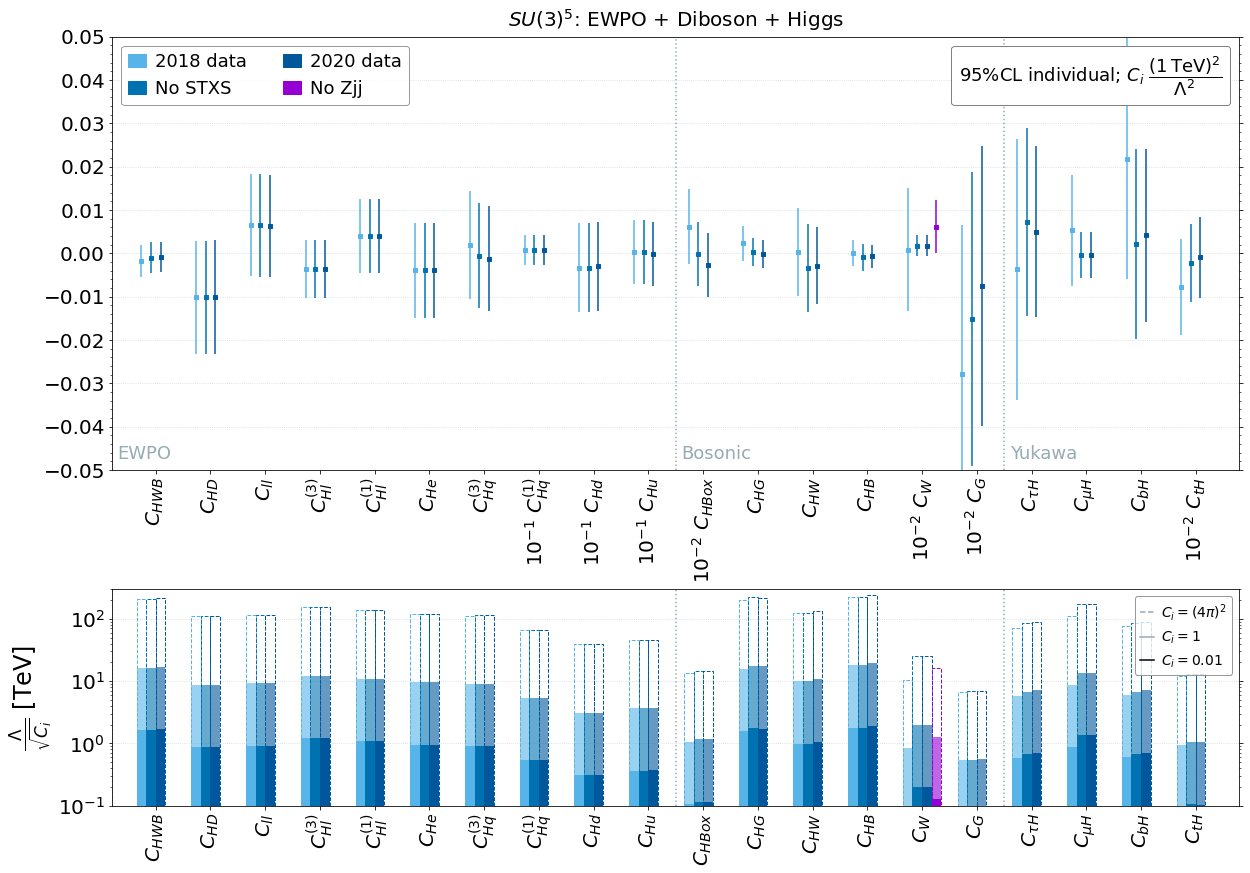

In [17]:
rcParams.update({
  'figure.subplot.left': 0.1,
  'figure.subplot.bottom': 0.07,
  #'figure.subplot.bottom': 0.,
  'figure.subplot.right': 0.97,
  'figure.subplot.top': 0.96,
})

indiv_scale_dict = {
    'CHWB' :1, 
    'CHD'  :1,
    'Cll'  :1,
    'CHl3' :1,
    'CHl1' :1,
    'CHe'  :1,
    'CHq3' :1,
    'CHq1' :0.1,
    'CHQP' :1,
    'CHQ3' :1,
    'CHQ1' :1,
    'CHu'  :0.1,
    'CHt'  :0.01,
    'CHd'  :0.1,
    'CW'   :0.01,
    'CHbox':0.01,
    'CHG'  :1,
    'CHW'  :1,
    'CHB'  :1,
    'CG'   :0.01,
    'CtH'  :0.01,
    'CtaH' :1,
    'CmuH' :1,
    'CbH'  :1
} 

ymin, ymax = -0.05, 0.05
ymin2, ymax2= 1e-1,300

scale_ind = np.array([indiv_scale_dict.get(c, 1.) for c in plot_coeffs])

fig, ax = plt.subplots(figsize=(18,12))
# add second axis below
divider = axes_grid1.make_axes_locatable(ax)
width = axes_grid1.axes_size.AxesY(ax.axes, aspect=0.5)
pad = axes_grid1.axes_size.Fraction(0.55, width)
ax2 = divider.append_axes('bottom', size=width, pad=pad)

labels = [ 
  r'{} ${}$'.format(strform(sc),otex[c]) 
  if sc!=1.
  else '${}$'.format(otex[c]) 
  for sc, c in zip(scale_ind, plot_coeffs)
]

ax.set_xticklabels(['']+labels, rotation=90., va='top', ha='center', fontsize=20)
ax2.set_xticklabels(['']+[r'${}$'.format(otex[c]) for c in plot_coeffs], rotation=90., va='top', ha='center', fontsize=20)
ax.set_ylim(ymin, ymax)
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.002))

ax2.set_ylim(ymin2, ymax2)
ax2.set_yscale('log')
for a in (ax, ax2):
    a.set_xlim(0.2,len(plot_coeffs)+0.8)
    a.xaxis.set_major_locator(MultipleLocator(1.))
    a.grid(axis='y', which='major', c=lightgrey, linestyle='dotted',zorder=0)
    a.tick_params(axis='y', labelsize=20, right=True, which='both')


ax2.set_ylabel(r'$\frac{\Lambda}{\sqrt{C_i}}$ [TeV]', fontsize=24)
for xval, name in zip((0.2,10.5,16.5), ('EWPO', 'Bosonic', 'Yukawa')):
    ax.plot([xval,xval],[ymin, ymax], ls='dotted', lw=1.5, c=grey)
    ax2.plot([xval,xval],[ymin2, ymax2], ls='dotted', lw=1.5, c=grey)
    ax.text(xval+0.1, ymin*0.95, name, fontsize=18, color=grey)


bf_list = [b['ind'] for b in bfs.values()]
sd_list = [ s['ind'] for s in sds.values()]
gap=0.175
ndata = len(bf_list)
offset = np.linspace(-gap*(ndata -1.)/2., gap*(ndata -1.)/2., num=ndata )

colors = (lightblue, blue, darkblue, purple, green)

for idata in range(len(bf_list)):
    plot_limits(
        bf_list[idata]*scale_ind, sd_list[idata]*scale_ind, 
        ax=ax, col=colors[idata], offset=offset[idata], zorder=2
    )
    plot_bar(1./np.sqrt(2*sd_list[idata]), ax=ax2, col=colors[idata], offset=offset[idata], width=gap, zorder=3, alpha=0.6)
    plot_transparent_bar(4.*np.pi/np.sqrt(2*sd_list[idata]), ax=ax2, col=colors[idata], offset=offset[idata], width=gap, ls='dashed', zorder=2)
    plot_bar(0.1/np.sqrt(2*sd_list[idata]), ax=ax2, col=colors[idata], offset=offset[idata], width=gap, zorder=3, alpha=1.0)

    
label_list = [
  r'2018 data',
  r'No STXS',
  r'2020 data',
  r'No Zjj'
]
handle_list = [plt.Rectangle((0,0),1,1, color=c) for c in colors]


leg = ax.legend(handle_list,label_list,loc=2, fontsize=18, handlelength=1, borderaxespad=0.5, handletextpad=0.5, ncol=2)
frame = leg.get_frame()
frame.set_edgecolor('grey')

label_list_2 = [r'$C_i=(4\pi)^2$',r'$C_i=1$',r'$C_i=0.01$']
handle_list_2 = [plt.Line2D((0,0),(0,1),color=c, linestyle=l) for (c,l) in zip((grey,grey,'#000000'),('--','-','-'))]
leg2 = ax2.legend(handle_list_2,label_list_2,loc=1, fontsize=14, handlelength=1, borderaxespad=0.5, handletextpad=0.5, ncol=1)
frame2 = leg2.get_frame()
frame2.set_edgecolor('grey') 

at=AnchoredText(
  r'$95 \%$CL individual; $C_i\,\,\dfrac{{(1\,\mathrm{{TeV}})^2}}{{\Lambda^2}}$', 
  loc=1, prop=dict(size=18), frameon=True, borderpad=0.5, pad=0.5*(14./16.),
)
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
at.patch.set_edgecolor('grey')
ax.add_artist(at)
ax.set_title(r'$SU(3)^5$: EWPO + Diboson + Higgs', fontsize=20, pad=10)
plt.savefig('Fig3/SU3_5_individual_comparison.pdf')
plt.show()

# 2. Hybrid Higgs+EWPO+diboson, old, noSTXS, OS-decay, marginalised (Fig 3)

In [18]:
rcParams.update({
  'figure.subplot.left': 0.1,
  'figure.subplot.bottom': 0.07,
  #'figure.subplot.bottom': 0.0,
  'figure.subplot.right': 0.97,
  'figure.subplot.top': 0.96,
})

marg_scale_dict = {
    'CHWB' :1, 
    'CHD'  :1,
    'Cll'  :10,
    'CHl3' :10,
    'CHl1' :1,
    'CHe'  :1,
    'CHq3' :10,
    'CHq1' :1,
    'CHQP' :1,
    'CHQ3' :1,
    'CHQ1' :1,
    'CHu'  :1,
    'CHt'  :0.1,
    'CHd'  :1,
    'CW'   :1,
    'CHbox':0.1,
    'CHG'  :10,
    'CHW'  :1,
    'CHB'  :1,
    'CG'   :0.1,
    'CtH'  :0.1,
    'CtaH' :10,
    'CmuH' :10,
    'CbH'  :10
} 



ymin, ymax = -2.6, 2.6
ymin2, ymax2= 1e-1,200

scale_mar = np.array([marg_scale_dict.get(c, 1.) for c in plot_coeffs])

fig, ax = plt.subplots(figsize=(18,12))
# add second axis below
divider = axes_grid1.make_axes_locatable(ax)
width = axes_grid1.axes_size.AxesY(ax.axes, aspect=0.5)
pad = axes_grid1.axes_size.Fraction(0.55, width)
ax2 = divider.append_axes('bottom', size=width, pad=pad)

labels = [ 
  r'{} ${}$'.format(strform(sc),otex[c]) 
  if sc!=1.
  else '${}$'.format(otex[c]) 
  for sc, c in zip(scale_mar, plot_coeffs)
]

ax.set_xticklabels(['']+labels, rotation=90., va='top', ha='center', fontsize=20)
ax2.set_xticklabels(['']+[r'${}$'.format(otex[c]) for c in plot_coeffs], rotation=90., va='top', ha='center', fontsize=20)
ax.set_ylim(ymin, ymax)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax2.set_ylim(ymin2, ymax2)
ax2.set_yscale('log')
for a in (ax, ax2):
    a.set_xlim(0.2,len(plot_coeffs)+0.8)
    a.xaxis.set_major_locator(MultipleLocator(1.))
    a.grid(axis='y', which='major', c=lightgrey, linestyle='dotted',zorder=0)
    a.tick_params(axis='y', labelsize=20, right=True, which='both')


ax2.set_ylabel(r'$\frac{\Lambda}{\sqrt{C_i}}$ [TeV]', fontsize=24)
for xval, name in zip((0.2,10.5,16.5), ('EWPO', 'Bosonic', 'Yukawa')):
    ax.plot([xval,xval],[ymin, ymax], ls='dotted', lw=1.5, c=grey)
    ax2.plot([xval,xval],[ymin2, ymax2], ls='dotted', lw=1.5, c=grey)
    ax.text(xval+0.1, ymin*0.95, name, fontsize=18, color=grey)


bf_list = [ b['mar'] for b in bfs.values()]
sd_list = [ s['mar'] for s in sds.values()]
gap=0.175
ndata = len(bf_list)
offset = np.linspace(-gap*(ndata -1.)/2., gap*(ndata -1.)/2., num=ndata )

colors = (yellow, orange, red, brown, pink)

for idata in range(len(bf_list)):
    plot_limits(
        bf_list[idata]*scale_mar, sd_list[idata]*scale_mar, 
        ax=ax, col=colors[idata], offset=offset[idata], zorder=2
    )
    plot_bar(1./np.sqrt(2*sd_list[idata]), ax=ax2, col=colors[idata], offset=offset[idata], width=gap, zorder=2, alpha=0.6)
    plot_transparent_bar(4.*np.pi/np.sqrt(2*sd_list[idata]), ax=ax2, col=colors[idata], offset=offset[idata], width=gap, ls='dashed', zorder=2)
    weak_scale_list = [0.1/np.sqrt(2*sd) if sd >= ymin2 else ymin2 for sd in sd_list[idata]]
    plot_bar(weak_scale_list, ax=ax2, col=colors[idata], offset=offset[idata], width=gap, zorder=3, alpha=1.0)

    
label_list = [
  r'2018 data',
  r'No STXS',
  r'2020 data',
  r'No Zjj'
]
handle_list = [plt.Rectangle((0,0),1,1, color=c) for c in colors]


leg = ax.legend(handle_list,label_list,loc=2, fontsize=18, handlelength=1, borderaxespad=0.5, handletextpad=0.5, ncol=2)
frame = leg.get_frame()
frame.set_edgecolor('grey')


label_list_2 = [r'$C_i=(4\pi)^2$',r'$C_i=1$',r'$C_i=0.01$']
handle_list_2 = [plt.Line2D((0,0),(0,1),color=c, linestyle=l) for (c,l) in zip((grey,grey,'#000000'),('--','-','-'))]
leg2 = ax2.legend(handle_list_2,label_list_2,loc=1, fontsize=14, handlelength=1, borderaxespad=0.5, handletextpad=0.5, ncol=1)
frame2 = leg2.get_frame()
frame2.set_edgecolor('grey') 


at=AnchoredText(
  r'$95 \%$CL marginalised; $C_i\,\,\dfrac{{(1\,\mathrm{{TeV}})^2}}{{\Lambda^2}}$', 
  loc=1, prop=dict(size=18), frameon=True, borderpad=0.5, pad=0.5*(14./16.),
)
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
at.patch.set_edgecolor('grey')
ax.add_artist(at)
plt.savefig('Fig3/SU3_5_marginalised_comparison.pdf')

plt.show()